<a href="https://colab.research.google.com/github/sunnyshahabuddin/Convolutional-Neural-Network/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten #this flatten our data into our neural network
from keras.layers.convolutional import Conv2D #this create the convolutional layer
from keras.layers.convolutional import MaxPooling2D #this create pooling layer

from keras.models import Model

In [4]:
np.random.seed(0)

In [5]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

In [8]:
num_of_samples=[]

In [9]:
cols = 5
num_classes = 10

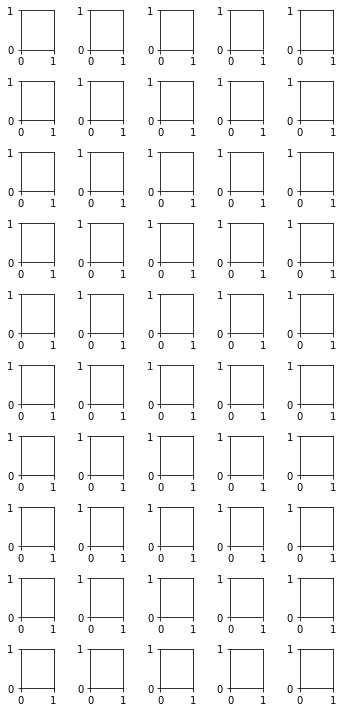

In [10]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

In [11]:
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


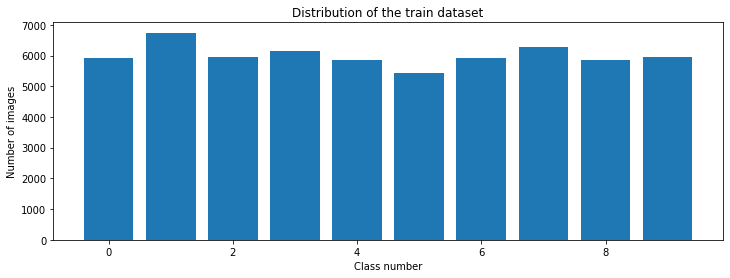

In [12]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [14]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [18]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #30 here is the number of filters 5by5 is the kernel matrix size
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model